### HW 4 
## Yangsong

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, zoomed_inset_axes
import sympy
from sympy import lambdify

In [2]:
def f(t):
    '''
    objective function 
    and first and second derivative 
    '''
    
    y = 50 * np.sin(t) + t**2
    dy = 50 * np.cos(t) + 2*t 
    ddy = -50 * np.sin(t) + 2
    
    return y, dy, ddy

In [3]:
#plot the function, given a series of t

tt = np.arange(-10, 10.1, 0.01)
ft, df, ddf = f(tt)


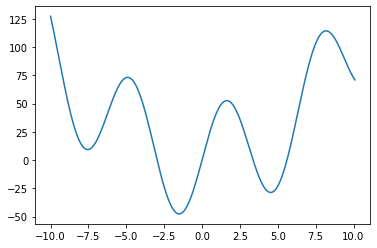

In [4]:
fig, ax = plt.subplots()
ax.plot(tt, ft)

In [8]:
# try to find the local minimum by dy = 0 and ddy >0 
error = 0.2
dfe0 = np.where((-error <df) & (df<error))
ddg0 = np.where(ddf >0)
root_dx = np.intersect1d(dfe0, ddg0)
loc_root = tt[root_dx]
loc_minima = f(loc_root)[0]
display('local minima {}, f(t) is {}'.format(loc_root, loc_minima))
glb_root = loc_root[np.argsort(loc_minima)[0]]
glb_minimum = f(glb_root)[0]
display('global minimum: ({},{})'.format(glb_root, glb_minimum))

'local minima [-7.55 -1.51  4.53], f(t) is [  9.29488669 -47.62752362 -28.64975938]'

'global minimum: (-1.510000000000181,-47.62752362487741)'

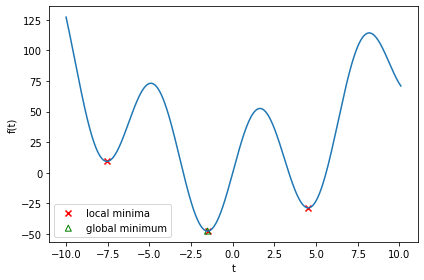

In [7]:
fig, ax = plt.subplots()
ax.plot(tt, ft)
ax.scatter(loc_root, loc_minima, color = 'red', marker = 'x',label = 'local minima')
ax.scatter(glb_root, glb_minimum, color = 'green', marker = '^', label = 'global minimum',facecolor='none')
ax.legend(loc = 'lower left')
ax.set_xlabel('t')
ax.set_ylabel('f(t)')
plt.tight_layout()
plt.savefig(r'../figures/global_minimum_value.jpg')

### implement gradient decent in python to find the local minimum 

i) (10) Pick a starting point at t=7. What's the minimum? Show the convergence
path. Experimenting with different learning rate.

In [9]:
def Gd(x0, c, eps):

    '''
    yangsong gu at 6:27 Pm Wednesday 10/20/2021
    gradient decent function
    args:    
            x0: the initial solution
            c:  learning rate, could influence the accuracy of solution
            eps: stop the loop when x didnt change 
            
    return  coord: x and fx of each iteration
            fig:   visualize the search step
    '''
    
    coord = []  # used to save the result at each iteration
    coord.append([x0, f(x0)[0]]) # start with x0
    
    error = float('inf')
    x_old = x0
    
    while error >= eps:
        
        x_new = x_old - c * f(x_old)[1]
        
        error = abs(x_new - x_old)
        coord.append([x_new, f(x_new)[0]])
        x_old = x_new
    
    coord = np.array(coord)
    
    return coord
          

In [10]:
# visualize search process
%matplotlib qt

def vis_gd(coord, x0, c):
    
    fig, ax = plt.subplots(figsize = (19.8,10.2))
    ax.set_ylim([-100,140])
    ax.plot(tt, ft)
    ax.scatter(coord[:,0], coord[:,1],marker = 'x', color = 'red')
    ax.set_xlabel('t')
    ax.set_ylabel('f(t)')
    ax.set_title('start with {}, learning rate is {}'.format(x0, c))

    hoff = 0.3 # horizontal offset
    voff = 3  # vertical offset
    for idx, rows in enumerate(coord):
        ax.text(rows[0]+ hoff, rows[1] - voff, 'X' + str(idx), c = 'red',horizontalalignment='center')

    axins2 = zoomed_inset_axes(ax, zoom=3, loc=4)
    axins2.plot(tt, ft)
    axins2.scatter(coord[:,0], coord[:,1],marker = 'x', color = 'red')
    hoff = 0.1 # horizontal offset
    voff = 10  # vertical offset
    for idx, rows in enumerate(coord):
        axins2.text(rows[0], rows[1] - voff, 'X' + str(idx), c = 'red',horizontalalignment='center',transform=ax.transAxes)

    # sub region of the original image
    if x0 == 7:
        x1, x2, y1, y2 = 4, 5.5, -30, 0
    elif x0 == 1:
        x1, x2, y1, y2 = -2, 0, -50,-25
    axins2.set_xlim(x1, x2)
    axins2.set_ylim(y1, y2)
    axins2.xaxis.set_tick_params(labeltop='on')
    axins2.xaxis.set_label_position('top') 
    axins2.xaxis.tick_top()

    mark_inset(ax, axins2, loc1=2, loc2=3, fc="none", ec="0.5")

    pth = r'../figures/{}-{}.jpg'.format(x0,c)
    plt.tight_layout()
    plt.savefig(pth)
    
#     return fig

In [11]:
x0, c = 7, 0.001
coord = Gd(x0, c, 0.0001)
vis_gd(coord, x0,c)

<ipython-input-10-fb1450b43ee8>:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


In [37]:
x0, c = 7, 0.01
coord = Gd(x0, c, 0.0001)
vis_gd(coord, x0,c)

<ipython-input-32-fb1450b43ee8>:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


In [38]:
x0, c = 7, 0.02
coord = Gd(x0, c, 0.0001)
vis_gd(coord, x0,c)

<ipython-input-32-fb1450b43ee8>:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


In [39]:
x0, c = 7, 0.03
coord = Gd(x0, c, 0.0001)
vis_gd(coord, x0,c)

<ipython-input-32-fb1450b43ee8>:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


In [40]:
x0, c = 1, 0.001
coord = Gd(x0, c, 0.0001)
vis_gd(coord, x0,c)

<ipython-input-32-fb1450b43ee8>:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


In [41]:
x0, c = 1, 0.01
coord = Gd(x0, c, 0.0001)
vis_gd(coord, x0,c)

<ipython-input-32-fb1450b43ee8>:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


In [42]:
x0, c = 1, 0.02
coord = Gd(x0, c, 0.0001)
vis_gd(coord, x0,c)

<ipython-input-32-fb1450b43ee8>:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


In [43]:
x0, c = 1, 0.03
coord = Gd(x0, c, 0.0001)
vis_gd(coord, x0,c)

<ipython-input-32-fb1450b43ee8>:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


# Problem 2, One Perceptron

In [24]:
def SLP(X, T):
    
    '''
    one perception
    Args   X train data
           T target value (label)
    '''
    ntr, nfe = X.shape  # sample and feature
    np.random.rand(522)
    w = np.random.rand(nfe+1)  # plus one bias
    # real output
    Z = np.empty(ntr)
    error = float('inf')
    iteration = 1
    maxiter = 10
    while (error > 0) & (iteration <= maxiter):

        # stop at iteration 10
        for i in range(ntr):

            Z[i] = w[:nfe] @ X[i,:].T >w[nfe]
            w[:nfe] += (T[i] - Z[i]) * X[i, :] 
            w[nfe]  -= T[i] - Z[i]

        error = abs(Z-T).sum()
        print('w is {}'.format(w))
        print("iteration: {}, inputs: {}, target: {}, perceptron output: {}".format(iteration, X, T, Z))
        iteration += 1
    
    return w

* OR gate

In [20]:
# input
X = np.array([[0,0],[1,0],[0,1],[1,1]])
# Target
T = np.array([0,1,1,1])
w = SLP(X, T)

w is [ 1.20333005  0.00562272 -0.10429384]
iteration: 1, inputs: [[0 0]
 [1 0]
 [0 1]
 [1 1]], target: [0 1 1 1], perceptron output: [0. 0. 1. 1.]
w is [ 1.20333005  1.00562272 -0.10429384]
iteration: 2, inputs: [[0 0]
 [1 0]
 [0 1]
 [1 1]], target: [0 1 1 1], perceptron output: [1. 1. 0. 1.]
w is [1.20333005 1.00562272 0.89570616]
iteration: 3, inputs: [[0 0]
 [1 0]
 [0 1]
 [1 1]], target: [0 1 1 1], perceptron output: [1. 1. 1. 1.]
w is [1.20333005 1.00562272 0.89570616]
iteration: 4, inputs: [[0 0]
 [1 0]
 [0 1]
 [1 1]], target: [0 1 1 1], perceptron output: [0. 1. 1. 1.]


* XOR gate

In [25]:
# input
X = np.array([[0,0],[1,0],[0,1],[1,1]])
# Target
T = np.array([1,0,0,1])
w = SLP(X, T)

w is [ 0.29541791  1.6766108  -0.22124463]
iteration: 1, inputs: [[0 0]
 [1 0]
 [0 1]
 [1 1]], target: [1 0 0 1], perceptron output: [0. 1. 0. 0.]
w is [0.29541791 1.6766108  0.77875537]
iteration: 2, inputs: [[0 0]
 [1 0]
 [0 1]
 [1 1]], target: [1 0 0 1], perceptron output: [1. 1. 1. 0.]
w is [0.29541791 1.6766108  0.77875537]
iteration: 3, inputs: [[0 0]
 [1 0]
 [0 1]
 [1 1]], target: [1 0 0 1], perceptron output: [0. 1. 1. 0.]
w is [0.29541791 1.6766108  0.77875537]
iteration: 4, inputs: [[0 0]
 [1 0]
 [0 1]
 [1 1]], target: [1 0 0 1], perceptron output: [0. 1. 1. 0.]
w is [0.29541791 1.6766108  0.77875537]
iteration: 5, inputs: [[0 0]
 [1 0]
 [0 1]
 [1 1]], target: [1 0 0 1], perceptron output: [0. 1. 1. 0.]
w is [0.29541791 1.6766108  0.77875537]
iteration: 6, inputs: [[0 0]
 [1 0]
 [0 1]
 [1 1]], target: [1 0 0 1], perceptron output: [0. 1. 1. 0.]
w is [0.29541791 1.6766108  0.77875537]
iteration: 7, inputs: [[0 0]
 [1 0]
 [0 1]
 [1 1]], target: [1 0 0 1], perceptron output: [0.

* AND gate

In [16]:
# input
X = np.array([[0,0],[1,0],[0,1],[1,1]])
# Target
T = np.array([0,0,0,1])
w = SLP(X, T)

iteration: 1, inputs: [[0 0]
 [1 0]
 [0 1]
 [1 1]], target: [0 0 0 1], perceptron output: [0. 1. 0. 0.]
iteration: 2, inputs: [[0 0]
 [1 0]
 [0 1]
 [1 1]], target: [0 0 0 1], perceptron output: [0. 1. 0. 0.]
iteration: 3, inputs: [[0 0]
 [1 0]
 [0 1]
 [1 1]], target: [0 0 0 1], perceptron output: [0. 1. 1. 0.]
iteration: 4, inputs: [[0 0]
 [1 0]
 [0 1]
 [1 1]], target: [0 0 0 1], perceptron output: [0. 0. 1. 0.]
iteration: 5, inputs: [[0 0]
 [1 0]
 [0 1]
 [1 1]], target: [0 0 0 1], perceptron output: [0. 1. 0. 1.]
iteration: 6, inputs: [[0 0]
 [1 0]
 [0 1]
 [1 1]], target: [0 0 0 1], perceptron output: [0. 0. 0. 1.]


## Problem 3

In [27]:
import sys
sys.path.append(r'C:\2021-2022-Fall-semester\EECS522\Project')

from mlclass import dimenReduction

%load_ext autoreload
%autoreload 2

In [28]:
# for AND gate
# input
X = np.array([[0,0],[1,0],[0,1],[1,1]])
# Target
T = np.array([0,0,0,1])


xx = np.arange(-1,1.6,0.1) # for vsualizing the decision boundary

In [38]:
# FLD + case 1
diR = dimenReduction(X,T)

w, fX, Sw_mtx = diR.FLD()
print(w)
wn = w/np.linalg.norm(w)
print(w/np.linalg.norm(w))
arr = fX[T==0]
covs0 = np.cov(arr.T)
means0 = np.mean(arr, axis = 0)

arr = fX[T==1]

covs1 = np.cov(arr.T) if arr.shape[0] > 1 else 0
means1 = np.mean(arr, axis = 0)
covavg = (covs0 + covs1) / 2  

x = sympy.Symbol('x')


fld_ed_0 = -0.5 * (x - means0)**2/covavg + np.log(0.5)
fld_ed_1 = -0.5 * (x - means1)**2/covavg + np.log(0.5)

fld_ed_bd = sympy.solve(fld_ed_0 - fld_ed_1, x)
print(fld_ed_bd)  

yyfld = 1.333 - xx

[-2. -2.]
[-0.70710678 -0.70710678]
{x: -2.66666666666667}


In [39]:

diR = dimenReduction(X,T)

pX, min_cp, maj_vet = diR.PCA(X,None,1)

# PCA + case 1
arr = pX[T==0]
covs0 = np.cov(arr.T)
means0 = np.mean(arr, axis = 0)

arr = pX[T==1]

covs1 = np.cov(np.transpose(arr)) if arr.shape[0] > 1 else 0
means1 = np.mean(arr, axis = 0)
covavg = (covs0 + covs1) / 2  

x = sympy.Symbol('x')


pca_ed_0 = -0.5 * (x - means0)**2/covavg + np.log(0.5)
pca_ed_1 = -0.5 * (x - means1)**2/covavg + np.log(0.5)

pca_ed_bd = sympy.solve(pca_ed_0 - pca_ed_1, x)

print('solution', pca_ed_bd)

wp = maj_vet /np.linalg.norm(maj_vet)
print(wp)

yypca = [2/3] * xx.shape[0]

when keeping 1 component, the error rate is 0.5, the eigenvalue is [0.33333333]
solution {x: 0.666666666666667}
[[0.]
 [1.]]


In [40]:
# AND gate

#input
X = np.array([[0,0],[1,0],[0,1],[1,1]])
# Target
T = np.array([0,0,0,1])
w = SLP(X, T)

x1, x2 = sympy.symbols('x1 x2')
y = sympy.solve(w[0]*x1 + w[1]*x2 - w[2], x2)
var = (x1)
pc_func = lambdify(var, y, modules = 'numpy')

yyper = np.array(pc_func(xx)).reshape(xx.shape)
w

w is [1.01898628 0.74319478 0.26047598]
iteration: 1, inputs: [[0 0]
 [1 0]
 [0 1]
 [1 1]], target: [0 0 0 1], perceptron output: [0. 0. 1. 0.]
w is [1.01898628 1.74319478 0.26047598]
iteration: 2, inputs: [[0 0]
 [1 0]
 [0 1]
 [1 1]], target: [0 0 0 1], perceptron output: [0. 1. 0. 0.]
w is [1.01898628 1.74319478 1.26047598]
iteration: 3, inputs: [[0 0]
 [1 0]
 [0 1]
 [1 1]], target: [0 0 0 1], perceptron output: [0. 1. 1. 0.]
w is [2.01898628 1.74319478 1.26047598]
iteration: 4, inputs: [[0 0]
 [1 0]
 [0 1]
 [1 1]], target: [0 0 0 1], perceptron output: [0. 0. 1. 0.]
w is [1.01898628 1.74319478 2.26047598]
iteration: 5, inputs: [[0 0]
 [1 0]
 [0 1]
 [1 1]], target: [0 0 0 1], perceptron output: [0. 1. 0. 1.]
w is [1.01898628 1.74319478 2.26047598]
iteration: 6, inputs: [[0 0]
 [1 0]
 [0 1]
 [1 1]], target: [0 0 0 1], perceptron output: [0. 0. 0. 1.]


array([1.01898628, 1.74319478, 2.26047598])

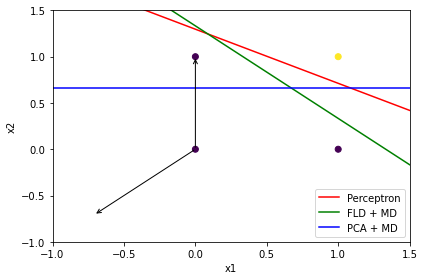

In [41]:
%matplotlib inline
fig, ax = plt.subplots()

ax.plot(xx, yyper, label = 'Perceptron', color = 'red')
ax.plot(xx, yyfld, label = 'FLD + MD', color = 'green')
ax.plot(xx, yypca, label = 'PCA + MD', color = 'blue')
ax.scatter(X[:,0],X[:,1], c= T)
ax.set_xlabel('x1')
ax.set_ylabel('x2')


ax.annotate("",(wp[0],wp[1]),(0,0), color = 'green', label = 'PCA direction',textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"))

ax.annotate("",(wn[0],wn[1]),(0,0), color = 'blue', label = 'FLD direction',textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"))
ax.set_xlim([-1, 1.5])
ax.set_ylim([-1, 1.5])
ax.legend(loc = 'lower right')
plt.tight_layout()
plt.savefig('../figures/AND_PCA_FLD_per.jpg')